##K-Nearest Neighbours using classical Iris Flower Dataset

## Introduction

Objective
In this exercise, we aim to build a simple Supervised machine learning model to predict the species of Iris flower based on its measurements. We will use the Iris dataset, a classical dataset in machine learning and statistics and often used for classification problems. It is included in Python scikit-learn in the datasets module. The dataset contains samples from three species of iris flowers: 
- Iris setosa, 
- Iris versicolor, and 
- Iris virginica. 


Each sample includes measurements for four features: sepal length, sepal width, petal length, and petal width.

The goal is to build a simple machine learning model that can learn from the measurements of these irises whose species is already known, so that we can predict the species for a new iris.

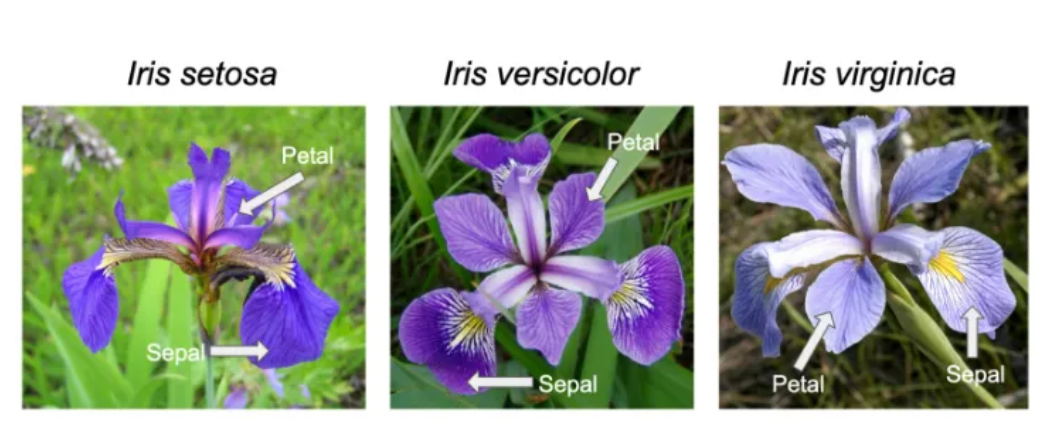

 Supervised learning deals with labeled data and focuses on learning patterns to make predictions or decisions, while unsupervised learning deals with unlabeled data and focuses on discovering hidden structure or relationships within the data. Here, in this dataset, we already have measurements for which we know the correct species of iris, this is a supervised learning problem. As specified above, we have 3 species of Iris flowers, i.e.,  every iris in the dataset belongs to any one of three classes or labels and our aim is to predict the species of the iris based on the measurements of the 4 features. This makes it a three-class classification problem.




## Understanding the dataset


We first load the data set using the load iris dataset using the sklearn.datasets and store it as iris.  We then print a short description of the dataset to gain insight into its structure and available attributes.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Keys of iris_dataset: \n{}".format(iris.keys()))



Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


We have provided a brief description of themajor keys of the iris dataset:

1. 'data': This key contains an array-like object that holds the feature values for each sample in the dataset. Each row represents a sample, and each column represents a feature.

2. 'target': This key contains an array of labels or target values corresponding to each sample in the dataset. These labels indicate the class or category to which each sample belongs.

3. 'frame': This key might contain a pandas DataFrame which could include additional metadata or information about the dataset, such as column names or index values.

4. 'target_names': This key contains an array of the names of the classes or categories of the Iris flower dataset that we aims to predict. In the case of the Iris dataset, it likely contains the names of the three species of iris flowers: 'setosa', 'versicolor', and 'virginica'.

5. 'DESCR': This key contains a description of the dataset, including details about its origin, structure, and usage. It often provides information about the dataset's source, number of samples, and any preprocessing steps that have been applied.

6. 'feature_names': This key contains an array of the names of the features or attributes used to describe each sample in the dataset. For the Iris dataset, it likely includes names such as 'sepal length', 'sepal width', 'petal length', and 'petal width'.

7. 'filename': This key might contain the filename or path of the file from which the dataset was loaded. It can be useful for tracking the source of the dataset.

8. 'data_module': This key might contain information about the module or package that provides the dataset. It could include version information or other metadata related to the dataset module.

These keys provide valuable information about the dataset's contents, structure, and metadata, enabling effective data analysis and modeling. We print some of the major keys to understand the iris dataset.

In [2]:
print("Target names: {}".format(iris['target_names']))
print("Feature names: \n{}".format(iris['feature_names']))
print("Type of data: {}".format(type(iris['data'])))
print("Shape of data: {}".format(iris['data'].shape))

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)


- The value of the key target_names is an array of strings, containing the 3 species of
flower that we want to predict.
- The value of feature_names is a list of strings, giving the description of each feature. 
- The data itself is contained in the target and data fields. The data contains the numeric
measurements of sepal length, sepal width, petal length, and petal width in a NumPy
array
- The 150 rows in the data array correspond to the 150 observations for each iris flowers, while the 4 columns represent the four measurements that were taken for each flower.





To count the occurrences/observations for each class label (3 species of iris) in the target array, we use the bincount function from NumPy and store the counts per class as class_counts.
The np.bincount() function is a NumPy function that counts the occurrences of each non-negative integer in an array. It is often used to count the occurrences of class labels in classification tasks, as it efficiently counts the frequency of each unique integer in an array.

We first import numpy as np and the use a for loop to count. We use the function enumerate() which would iterate over the counts for each class, providing both the index and the count. enumerate() returns a tuple containing the index and the count for each element in class_counts. 
A tuple is a data structure in Python that is similar to a list, but it is immutable, meaning its contents cannot be changed after creation. It is represented by parentheses () and can contain a sequence of elements separated by commas.

In [3]:
import numpy as np
target= iris.target
class_counts = np.bincount(target)
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} observations")
    

Class 0: 50 observations
Class 1: 50 observations
Class 2: 50 observations


We find the statistical summary of the dataset using the describe() method. The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

## Exploratory Data Analysis

In [4]:

import pandas as pd

iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We will check if our data contains any missing values or not. Missing values can occur when no information is provided for one or more items or for a whole unit. We will use the isnull() method.

In [5]:

iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

None of the columns in the data have missing values.  We use Pandas drop_duplicates() method to remove any duplicates from the data frame.

Comparison of the iris species with respect to sepal length and width

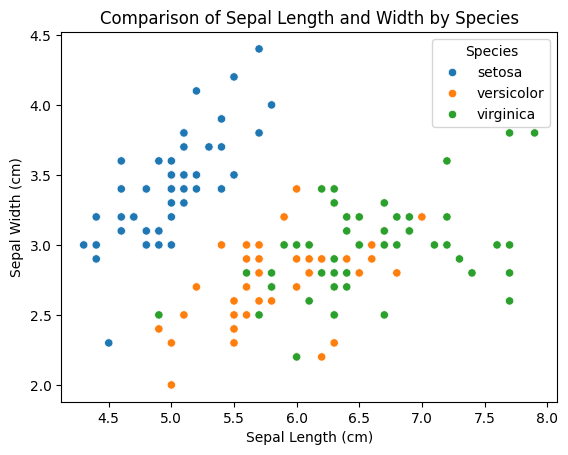

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target  # Adding target column
iris_data['species'] = iris.target_names[iris.target]  # Adding species column

sns.scatterplot(data=iris_data, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Comparison of Sepal Length and Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

Iris Setosa species has smaller sepal length but higher width.
Versicolor lies in almost middle for length as well as width
Virginica has larger sepal lengths and smaller sepal widths

Comparison of the iris species with respect to petal length and width

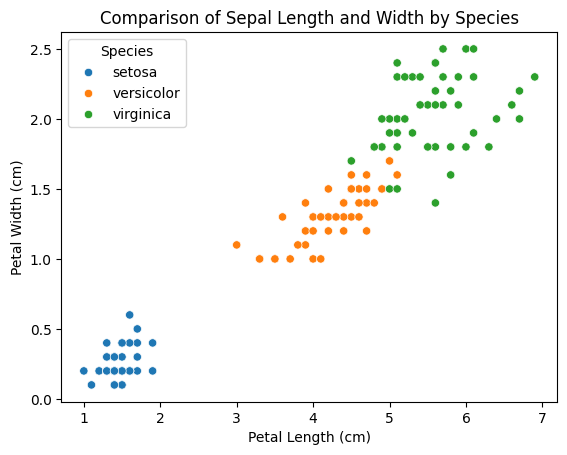

In [7]:
sns.scatterplot(data=iris_data, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title('Comparison of Sepal Length and Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

Setosa species have the smallest petal length as well as petal width
Versicolor species have average petal length and petal width
Virginica species have the highest petal length as well as petal width

Bivariate Analysis: We visualize the data using scatter plot to inspect any abnormalities. A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point.  To create the plot, we first convert the NumPy array into a pandas DataFrame. Pandas has a function to create pair plots called scatter_matrix.

C:\Users\kk\AppData\Local\Temp\ipykernel_36852\1838236190.py:10: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(handles, [f"Class {i}" for i in range(3)], loc='upper right')


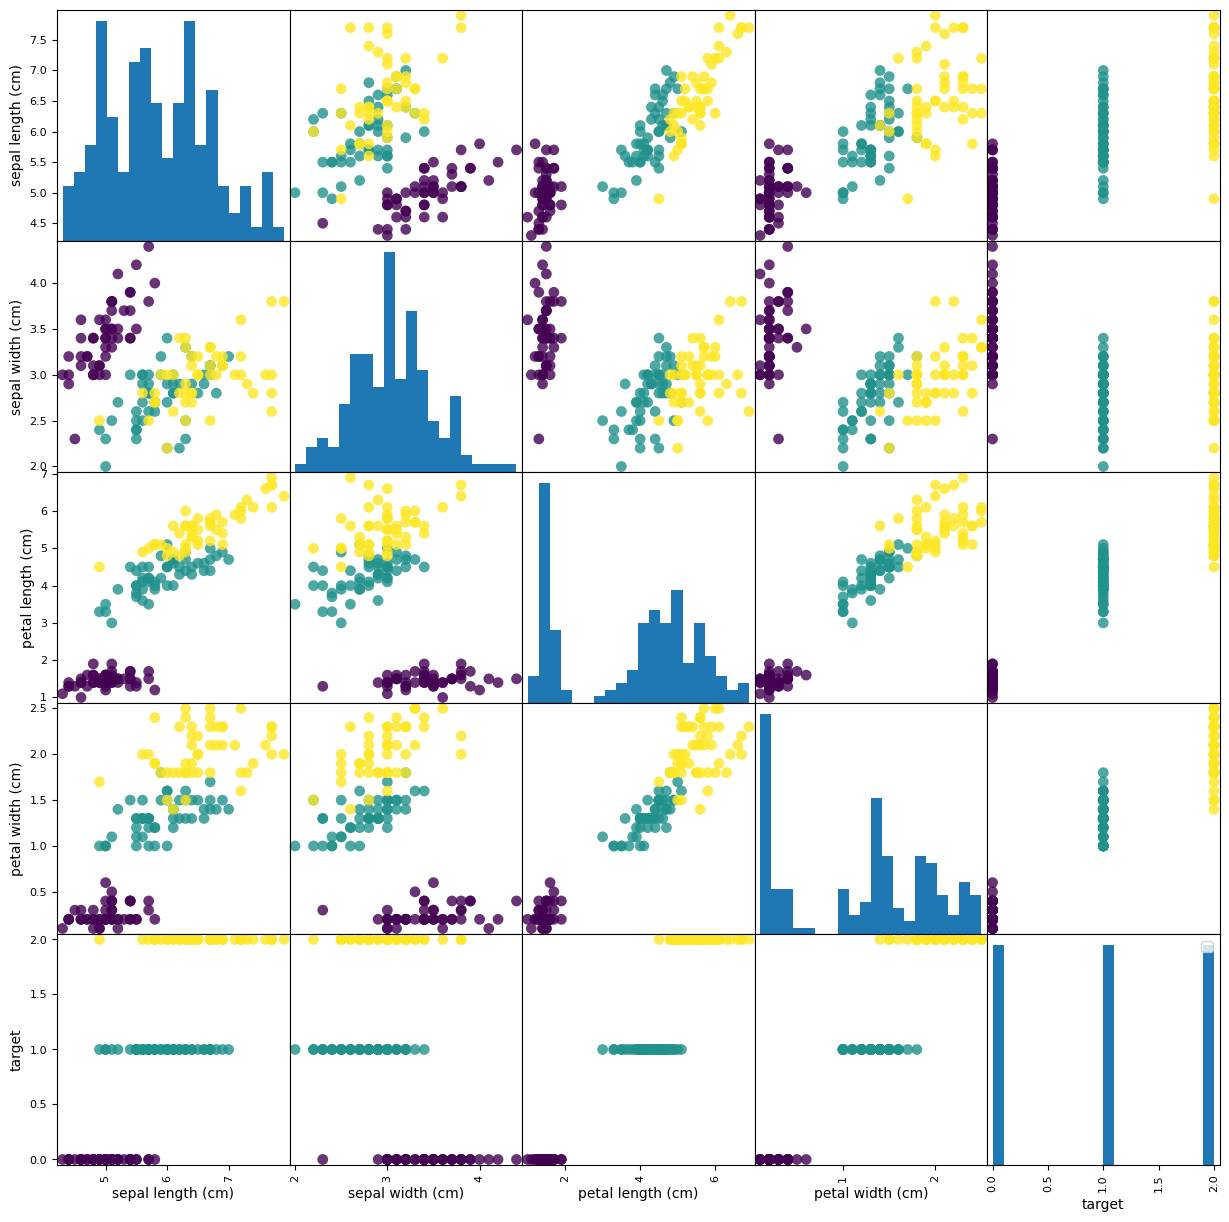

In [8]:
from pandas.plotting import scatter_matrix


# Create the scatter matrix
plot = scatter_matrix(iris_data, c=iris_data['target'], figsize=(15, 15), marker='o',
                      hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='viridis', diagonal='hist')

# Add legend
handles = [plt.plot([],[], ls="", marker="o", markersize=10, label=f"Class {i}") for i in range(3)]
plt.legend(handles, [f"Class {i}" for i in range(3)], loc='upper right')

plt.show()

We can also perform the same analysis using the seaborn library using the pairplot function and used plt.show() from the matplotlib.pyplot library

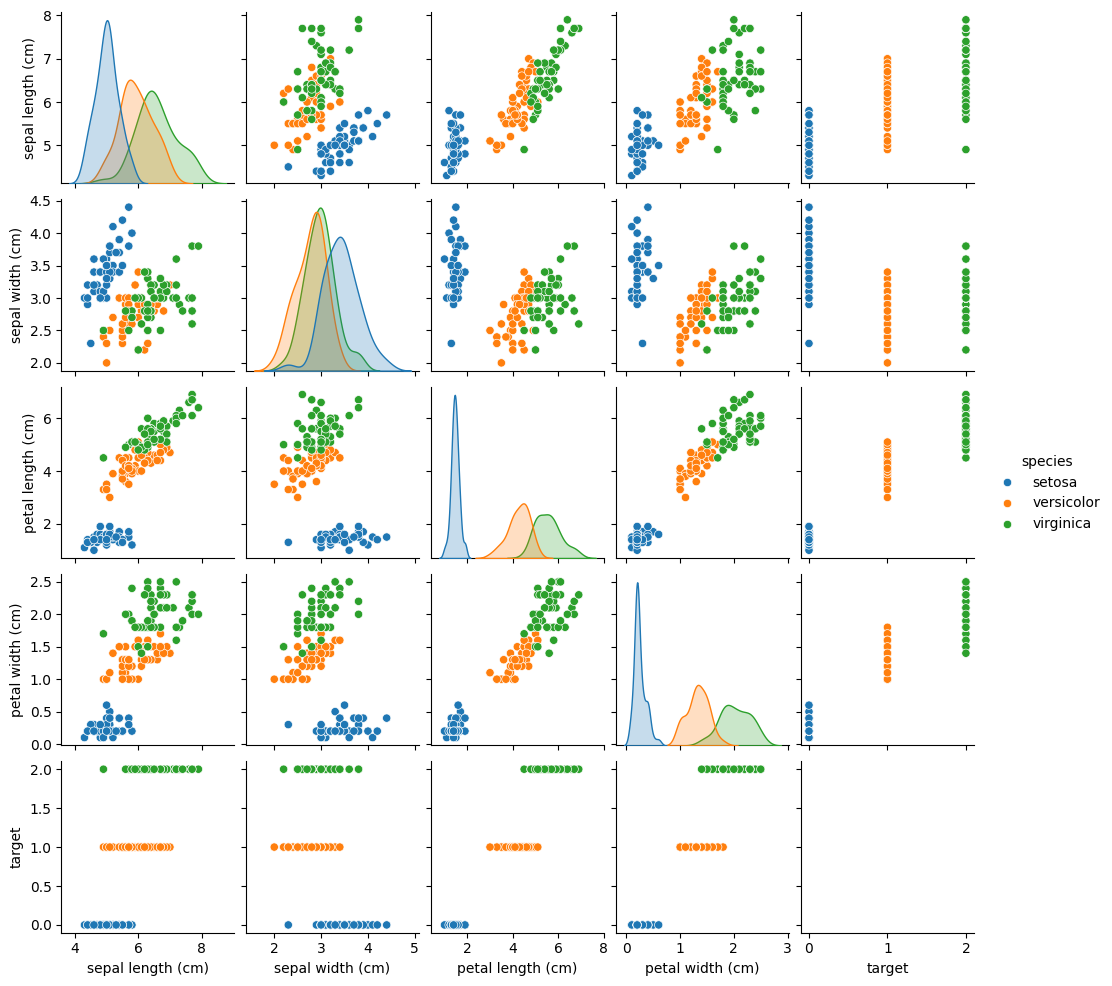

In [15]:
  
sns.pairplot(iris_data, hue='species', height=2)
plt.show()

- Diagonal Plots (Histograms/frequency distributions): Along the diagonal of the plot grid, we see histograms for each variable. These histograms represent the frequency distribution of each feature in the dataset. Each histogram shows the frequency distribution of values on Y axis against each value of the particular feature.

- Off-Diagonal Plots (Scatterplots): The rest of the plot grid consists of scatterplots. Each scatterplot represents the relationship between two variables. Each point in the scatterplot represents a data point. The x-axis and y-axis of each scatterplot correspond to two different variables in the dataset.

 If the points in a scatterplot form a clear pattern or trend (like a straight line), it indicates a strong relationship between the two variables.

 If the points are scattered randomly with no apparent pattern, it suggests a weak or no relationship between the variables.

- Color Coding (Target Classes): In your plot, points are coloured based on the target classes (iris species). This allows us to visually discern how the variables separate different classes. Each species might have a distinct pattern or cluster in the scatterplots. 

- Legend: The legend in the upper right corner of the plot indicates the class labels corresponding to the colors used in the plot. This helps interpret which species each color represents.


From the plots, we can see that the three classes of iris species (yellow, blue and purple) seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them.

# K-Nearest Neighbours (KNN)



KNN is a simple non-parametric supervised machine learning technique which is generally used for classification problems. The algorithm is trained for labeling an unknown data point given existing labeled data. Since, the exisitng data set can be grouped into categories or labelled, it is called a supervised machine learning algorithm. Its is non-parametric as it does not assume any statistical distribution. 

KNN is a distance based classifier; it implicitly assumes that the smaller the distance between two points, the more similar they are. For any new data point, it identifies K- nearest neighbours based on a distance metric. The class or label of the data point is then determined by the majority vote or most observed class labels in the K-nearest neighbors. The advantage of this approach is that it allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data.

The variaous distance metrics which can be used are as follows:

# Euclidean Distance
This is simply the length of the straight line joining the 2 points which are taken into consideration. Its the cartesian distance between 2 points on a plane.
    
# Manhattan Distance
Manhattan Distance metric is generally used to calculate the total distance traveled by the object instead of the displacement. This metric is calculated by summing the absolute difference between the coordinates of the points in n-dimensions.

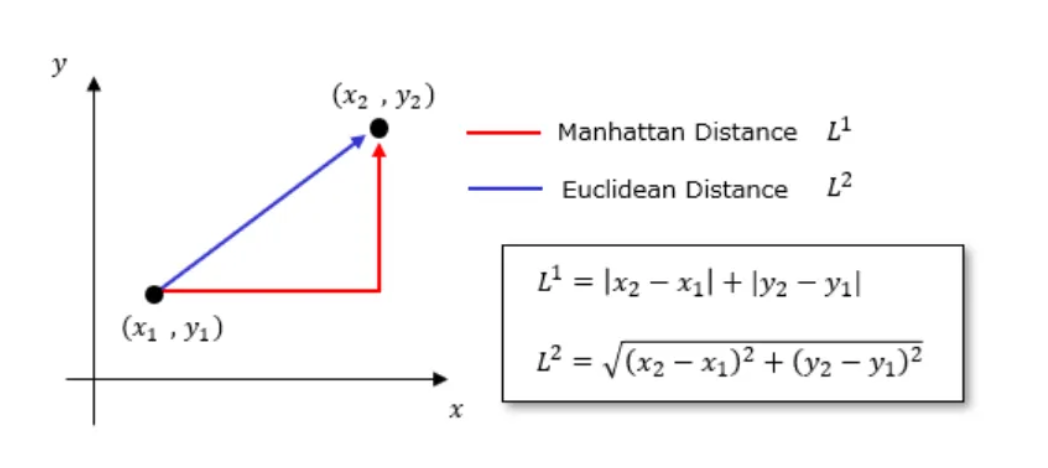

# Minkowski Distance
Minkowski is a generalised form of euclidean and Manhattan distance. Intuitively, it can be represented as:

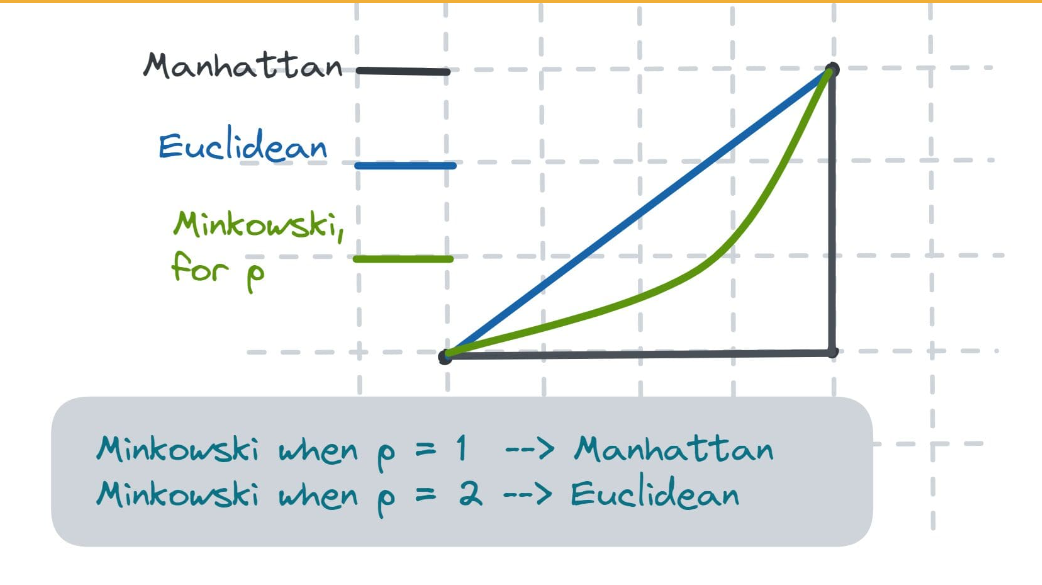

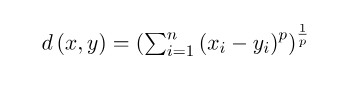      

From the formula above we can say that when p = 2 then it is the same as the formula for the Euclidean distance and when p = 1 then we obtain the formula for the Manhattan distance.

These are the most common methods to calculate the distance metrics for KNN. We will consider the Minkowski distance in out example.

We will split out data into training and testing data. scikit-learn library contains a function that shuffles the dataset and splits it using the train_test_split function. This function extracts 75% of the rows in the data as the training set and the remaining 25% of the data as the test set.
In scikit-learn, X denotes the data, while classes corresponding to the observations are denoted by a lowercase y following the denotion f(x)=y in mathematics, where x is the input to a function and y is the output. 

X is a two dimentional array of the independent variables and y is single dimentional array (the target classes)  


In [26]:
from sklearn.model_selection import train_test_split
X = iris_data.drop(columns=['species','target'])  # Features
y = iris_data['species']                # Target
X_train, X_test, y_train, y_test = train_test_split(
 X,y, random_state=0)

Before making the train test split, the function shuffles the data. Shuffling the data before splitting it into training and testing sets is crucial to ensure that the data is randomized and representative of the entire dataset. This helps prevent situations where all instances of a particular class end up in either the training or testing set, which could lead to biased results.Eg, the 25% test data might contain data for just one out of the 3 classes which wont give an idea how well the model segregates the various classes. Hence, shuffling is required.

The random_state parameter is used in machine learning algorithms, specifically when dealing with randomness or randomness-like behavior, such as shuffling data or initializing random values.

In simple terms, when you set random_state to a specific number (like 0), you're essentially fixing the randomness. This means that every time you run the code with the same value of random_state, you'll get the same result. It's like setting a starting point for a sequence of random numbers, ensuring that you always get the same sequence.

So, if you want your results to be replicable, meaning you want the same outcome every time you run your code, you should set random_state to a fixed value. This is particularly useful for debugging, sharing code with others, or comparing different models under the same conditions.

In [28]:
# training data set number of observations
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# test data set number of observations
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


We can see that the training data set consists of 75% of the data and the test data set contains the remaining 25%

The value of 𝑘 in k-nearest neighbors (k-NN) is crucial because it directly influences the model's performance and generalization ability. as mentioned above, the alogrithm chooses the most observed class in the k- neighbourest neigbours.

A smaller 𝑘 can lead to overfitting, while a larger 𝑘 k may cause underfitting.

We will start with just one neighbour for simplicity.

We will use the KNeighborsClassifier class from the scikit-learn library and  set the parameter 𝑘 of the model to 1.


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

The output of knn.fit(X_train, y_train) represents the result of fitting the k-nearest neighbors (k-NN) classifier to the training data.Output: When you call knn.fit(X_train, y_train), the function executes silently without any output by default. If there are no errors, it indicates that the model has been successfully trained.

# KNN Model Predictions

We can now make predictions using this model on new data for which we might not
know the correct labels. for Example, consider we find a Iris sepal length of 4 cm, a sepal width of 3.9 cm, a petal length of 2 cm, and a petal width of 0.25 cm. We can put this data into a NumPy array, again by calculating the shape—that is, the number of samples (1 observation) multiplied by the number of features (4):


In [31]:
X_new = np.array([[4, 3.9, 2, 0.25]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


We predict the class of iris flower using knn.predict fuunction and passing the new numpy array X_new

In [44]:
prediction = knn.predict(X_new)
print(prediction)

['setosa']


c:\Users\kk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Our model predicts that this new iris belongs to the class 0, meaning its species is setosa. However, we need to test the model on the actual data to understand if we can trust the prediction of the model. In otherwords, we need to measure the accuracy of the model. Acccuracy means the fraction of flowers for which the right species was predicted. So we use the remaining 25% of the data saves as test data for calculating accuracy.


In [62]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'virginica' 'setosa'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor' 'setosa']


In [63]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

# or print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.92


For this model, the test set accuracy is about 0.97, which means wthemodel predicts the correct species for 92% of the irises in the test set.

Here, we bulit the model just using one neighbour which is complex. The more complex we allow our model to be, the better we will be able to predict on the training data. The KNN predictions using one neighbour is shown below:

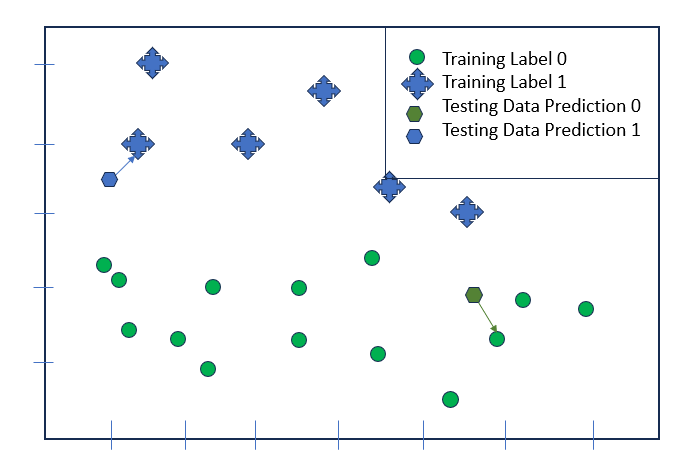

With just one neighur, the model is too complex. If our model becomes too complex the model starts focusing too much on each individual data point in our training set, and the model will not generalize well to new data. This implies model overfitting.

As 𝑘 increases, the complexity decreases, and the model's capacity to capture complex patterns in the data diminishes. This can result in underfitting if the true relationship between features and target is complex.


the KNN prediction using multiple neighbours is shown below:
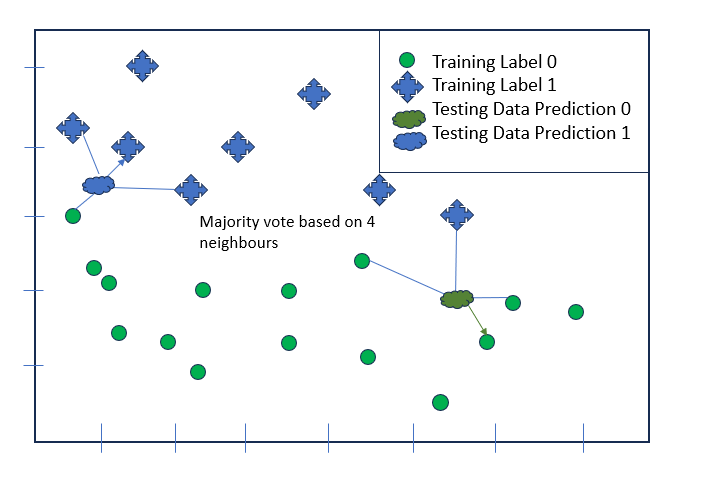


With a large value of 𝑘, the model becomes more biased. This means the model is less sensitive to local variations in the data and tends to make more generalized predictions. A larger 𝑘 value might cause the model to incorporate irrelevant or noisy data points in its decision-making process leading to a loss of iscriminative power, as the model might start to classify points from different classes incorrectly due to the inclusion of distant neighbors that are not representative of the true underlying pattern. 

The trade-off between model complexity and accuracy is illustrated in figure below:

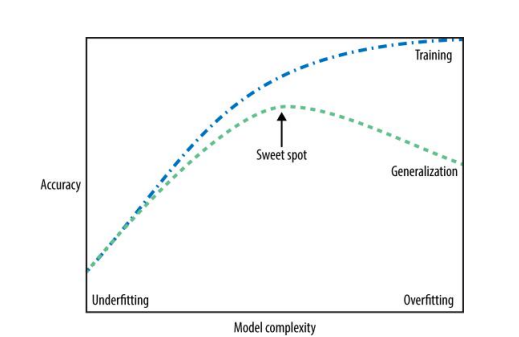

To find the relationship between model complexity and accuracy we evaluate training and test set performance with different numbers of neighbors. We perform parameter tuning for the number of neighbors 𝑘 in the  kNN classifier. It iterates over different values of 𝑘 specified in the neighbors_settings list, builds a kNN classifier for each 𝑘, trains it on the training data (X_train, y_train), and evaluates its performance on both the training and test sets.

We calculate the accuracy of the trained classifier on both the training and test sets using the score method, and append these accuracies to the training_accuracy and test_accuracy lists respectively. Finally, we plot the training and test accuracies against the number of neighbors k. 

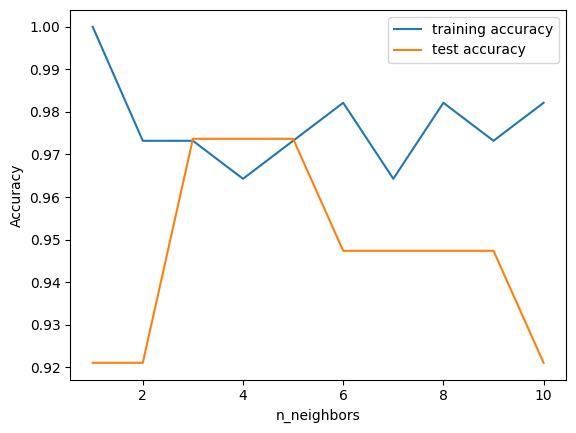

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
 X,y, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


This process helps visualize how the performance of the k-NN classifier varies with different values of 
𝑘 , allowing you to select the optimal 𝑘 value that maximizes the model's generalization performance. The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis.

It is to be noted that less neighbours imply more complex model and vice vers as justified above. Model complexity is intimately tied to the variation of inputs contained in your training dataset: the larger variety of data points your dataset contains, the more complex a model you can use without overfitting

Considering a single nearest neighbor, the prediction on the training set is perfect. However, this is overfitting as we can see that the testing accuracy is lower. But when more neighbours are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around 3 neighbors where the accuracy is arounf 97% compared tot he model with just 1 neighbour.